In [1]:
import pandas as pd

In [2]:
MBO = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [3]:
MBO

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import mlxtend

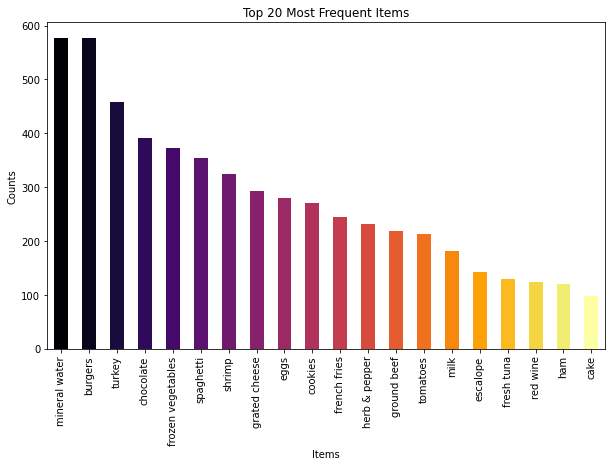

In [7]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
MBO[0].value_counts().head(20).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.show()

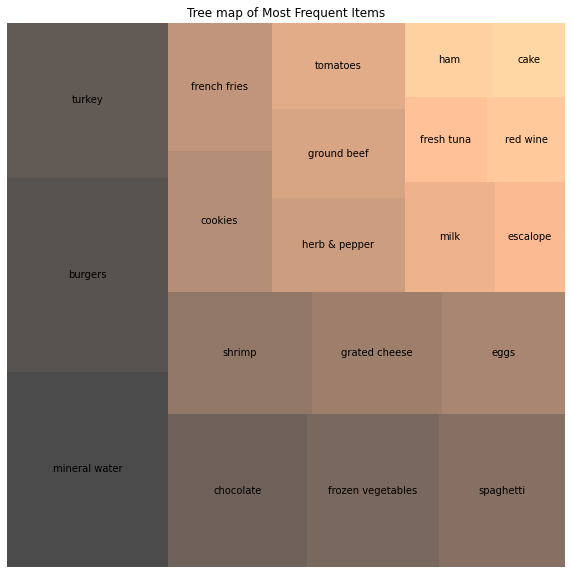

In [12]:
# Tree Map of Most Frequent Items
import squarify
plt.rcParams['figure.figsize']=(10,10)
Items = MBO[0].value_counts().head(20).to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.copper(np.linspace(0,1,20))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent Items')
plt.axis('off')
plt.show()

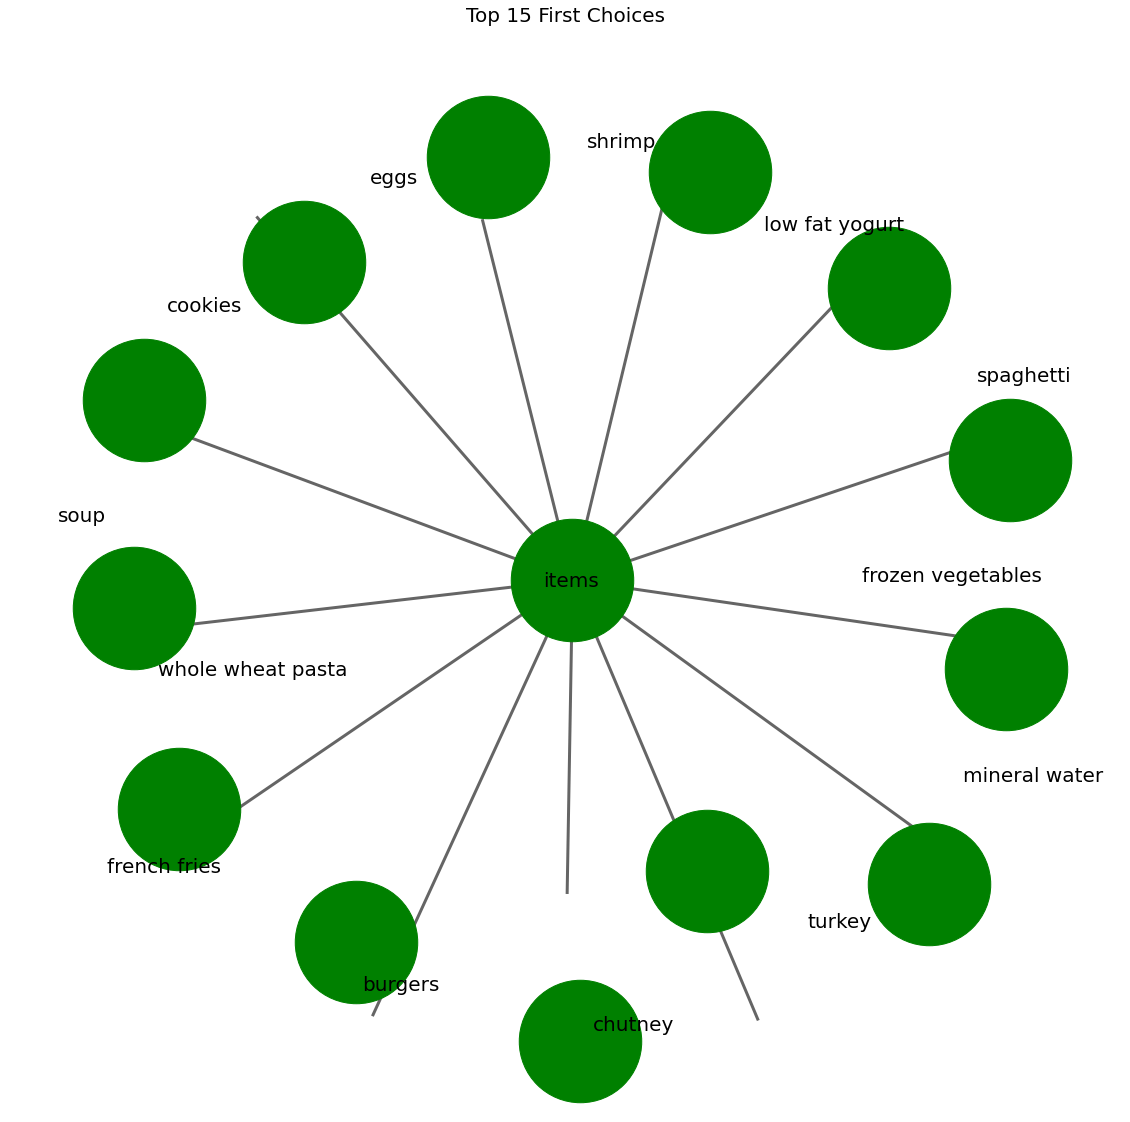

In [14]:
MBO['Items'] = 'items'
df = MBO.truncate(before=-1,after=15)

import networkx as nx

Items = nx.from_pandas_edgelist(df, source = 'Items', target = 0, edge_attr = True)

plt.rcParams['figure.figsize'] = (20,20)
nx.draw_networkx_nodes(G=Items,pos=nx.spring_layout(Items), node_size=15000,node_color='green')
nx.draw_networkx_edges(G=Items,pos=nx.spring_layout(Items), alpha=0.6, width=3 ,edge_color='black')
nx.draw_networkx_labels(G=Items,pos=nx.spring_layout(Items),font_size=20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [15]:
MBO.drop(columns='Items',axis=1, inplace=True)
MBO.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# list of list is needed as an input for transaction encoder
transactions = []
for i in range(0,7501):
    transactions.append([str(MBO.values[i,j]) for j in range(0,20)])

In [18]:
from mlxtend.preprocessing import TransactionEncoder
transac = TransactionEncoder()
dataset = transac.fit_transform(transactions)
dataset

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [20]:
Market_Basket = pd.DataFrame(dataset, columns= transac.columns_)
Market_Basket.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [21]:
#Apriori Algorithm to find out most frequent itemset with min support of 0.003

from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(Market_Basket, min_support=0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [22]:
frequent_itemsets.head(20)

,support,itemsets,length
0,0.020397,(almonds),1
1,0.008932,(antioxydant juice),1
2,0.004666,(asparagus),1
3,0.033329,(avocado),1
4,0.004533,(babies food),1
5,0.008666,(bacon),1
6,0.010799,(barbecue sauce),1
7,0.014265,(black tea),1
8,0.009199,(blueberries),1
9,0.011465,(body spray),1


In [23]:
# Association Rules Mining to generate the rules with their coresponding support
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(almonds),0.087188,0.020397,0.005199,0.059633,2.923577,3.420901e-03,1.041724,0.720799
1,(almonds),(burgers),0.020397,0.087188,0.005199,0.254902,2.923577,3.420901e-03,1.225089,0.671653
2,(almonds),(cake),0.020397,0.081056,0.003066,0.150327,1.854607,1.412939e-03,1.081527,0.470397
3,(cake),(almonds),0.081056,0.020397,0.003066,0.037829,1.854607,1.412939e-03,1.018117,0.501448
4,(chocolate),(almonds),0.163845,0.020397,0.005999,0.036615,1.795099,2.657211e-03,1.016834,0.529719
5,(almonds),(chocolate),0.020397,0.163845,0.005999,0.294118,1.795099,2.657211e-03,1.184553,0.452150
6,(eggs),(almonds),0.179709,0.020397,0.006532,0.036350,1.782108,2.866880e-03,1.016555,0.535014
7,(almonds),(eggs),0.020397,0.179709,0.006532,0.320261,1.782108,2.866880e-03,1.206774,0.448005
8,(french fries),(almonds),0.170911,0.020397,0.004399,0.025741,1.261983,9.133031e-04,1.005485,0.250391
9,(almonds),(french fries),0.020397,0.170911,0.004399,0.215686,1.261983,9.133031e-04,1.057089,0.211919


In [24]:
rules[(rules['lift'] >= 5) & (rules['confidence'] >= 0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8192,"(mineral water, whole wheat pasta)",(olive oil),0.009599,0.065858,0.003866,0.402778,6.115863,0.003234,1.564145,0.844598
15899,"(nan, mineral water, whole wheat pasta)",(olive oil),0.009599,0.065858,0.003866,0.402778,6.115863,0.003234,1.564145,0.844598
15903,"(mineral water, whole wheat pasta)","(olive oil, nan)",0.009599,0.065725,0.003866,0.402778,6.128268,0.003235,1.564368,0.844932
